<a href="https://www.kaggle.com/code/haroonzafar2/titanic-dataset-competition?scriptVersionId=116195506" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


Importing Libraries

In [2]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

Data Collection and Processing

In [3]:
# Loading the Data from CSV file to Pandas DataFrame.

titanicData = pd.read_csv("/kaggle/input/titanic/train.csv")

In [4]:
# Printing the Header of the dataframe, Header means first five rows of the dataframe

titanicData.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
# Number of Rows and Columns 
titanicData.shape

(891, 12)

In [6]:
# Getting Some Information about data. 

titanicData.info()
# There are 891 rows, but in some columns there are 714 non-null values which means ..
# ... these Columns have some null values.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
# Checking Missing Values in each Column

titanicData.isnull().sum()

# We have 177 missing values in our Age Column
# We have 687 missing values in our Cabin Column
# We have 2 missing values in our Embarked Column

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Handling the Missing Values

In [8]:
# Dropping the Cabin Column because there are so many Missing values/NaN values 
# Column `Cabin` has a significant amount of missing values so we can't delete records of empty Cabin values.
# we have to drop Column `Cabin`

titanicData = titanicData.drop(columns='Cabin', axis = 1)

In [9]:
# Replacing the Missing Values in `Age` Column with Mean Values 
# inplace = True means changes are occuring in the actual dataframe and we don't
# .. to explicitly save it
# The fillna() function is used to fill NA/NaN values using the specified method

titanicData['Age'].fillna(titanicData['Age'].mean(), inplace = True )

In [10]:
titanicData.info()
# we got the right result that is no null values. 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [11]:
# Finding the mode value of `Embarked` column

print(titanicData['Embarked'].mode())

0    S
dtype: object


In [12]:
print(titanicData['Embarked'].mode()[0])

S


In [13]:
# replacing the missing values in `Embarked` Column with mode Value. 
# The fillna() method replaces the NULL values with a specified value. 

titanicData['Embarked'].fillna(titanicData['Embarked'].mode()[0], inplace = True)

In [14]:
# Cross Checking for the missing values 
titanicData.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

Data Analysis 

In [15]:
# Statistical Parameters of the Dataframe
titanicData.describe()
# It is not very helpful because we have categorical Column
# Age and Fare are numerical values not categorical so it is helpful in that

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [16]:
# Finding the nUmber of People Survived and Not Survived
# value_counts() return a Series containing counts of unique rows in the DataFrame
titanicData['Survived'].value_counts()


0    549
1    342
Name: Survived, dtype: int64

Data Visualization

In [17]:
sns.set()

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Survived', ylabel='count'>

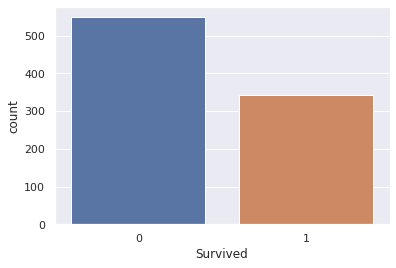

In [18]:
# Making a count Plot for `Survived` Column

sns.countplot("Survived", data = titanicData)

In [19]:
titanicData['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Sex', ylabel='count'>

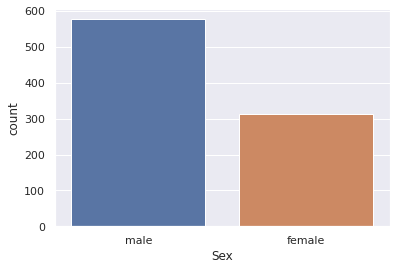

In [20]:
# Making a Count Plot for "Sex" Column 

sns.countplot("Sex", data = titanicData)

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Sex', ylabel='count'>

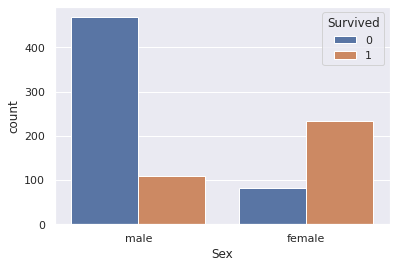

In [21]:
# Number of Survivors Gender wise
# Hue is the parameter in the countplot function taking the column name for color encoding

sns.countplot("Sex", hue = "Survived", data = titanicData)

# Out of 577 Males, around 100 survived 
# Out of 314 Females, around ~240 survived
# BECAUSE FEMALES WERE GIVEN PRIORITY, REMEMBER `LADIES AND CHILDREN` FIRST RULE

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Pclass', ylabel='count'>

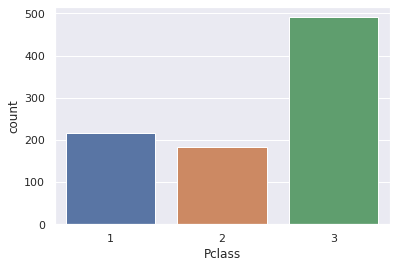

In [22]:
# Making a count plot for "Pclass" column 

sns.countplot("Pclass", data = titanicData)